<a href="https://colab.research.google.com/github/Fahad021/Multiple-time-series-forecasting-in-parallel/blob/master/prophet_parallel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# This is formatted as code
The code is from : 
https://medium.com/spikelab/forecasting-multiples-time-series-using-prophet-in-parallel-2515abd1a245
```

In [0]:
import pandas as pd
import numpy as np
def rnd_timeserie(min_date, max_date):
    time_index = pd.date_range(min_date, max_date)
    dates = (pd.DataFrame({'ds': pd.to_datetime(time_index.values)},
                          index=range(len(time_index))))
    y = np.random.random_sample(len(dates))*10
    dates['y'] = y
    return dates


In [0]:
series = [rnd_timeserie('2018-01-01','2018-12-30') for x in range(0,500)]

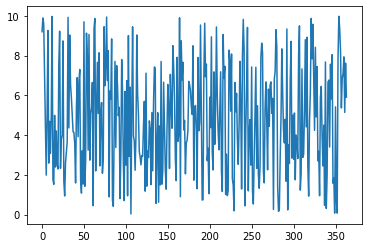

In [19]:
import matplotlib.pyplot as plt
example = series[0]
plt.plot(example['y'])

In [0]:
from fbprophet import Prophet
def run_prophet(timeserie):
    model = Prophet(yearly_seasonality=False,daily_seasonality=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=90, include_history=False)
    forecast = model.predict(forecast)
    return forecast

In [7]:
f = run_prophet(series[0])
f.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-31,4.774490,1.834845,8.610292,4.774490,4.774490,0.441981,0.441981,0.441981,0.441981,0.441981,0.441981,0.0,0.0,0.0,5.216471
1,2019-01-01,4.774056,0.728544,7.586690,4.774056,4.774056,-0.468912,-0.468912,-0.468912,-0.468912,-0.468912,-0.468912,0.0,0.0,0.0,4.305143
2,2019-01-02,4.773621,1.227822,7.978005,4.773621,4.773621,-0.008172,-0.008172,-0.008172,-0.008172,-0.008172,-0.008172,0.0,0.0,0.0,4.765449
3,2019-01-03,4.773186,1.065139,7.956006,4.773186,4.773186,-0.185465,-0.185465,-0.185465,-0.185465,-0.185465,-0.185465,0.0,0.0,0.0,4.587721
4,2019-01-04,4.772752,0.688208,7.642531,4.772752,4.772752,-0.461588,-0.461588,-0.461588,-0.461588,-0.461588,-0.461588,0.0,0.0,0.0,4.311163


In [1]:
pip install tqdm==2.2.3

In [12]:
import time
from tqdm import tqdm
start_time = time.time()
result = list(map(lambda timeserie: run_prophet(timeserie), tqdm(series)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 960.1661784648895 seconds ---


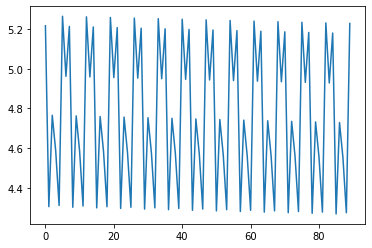

In [23]:
test= result[0]
plt.plot(test['yhat'])

In [14]:
from multiprocessing import Pool, cpu_count
p = Pool(cpu_count())
predictions = list(tqdm(p.imap(run_prophet, series), total=len(series)))
p.close()
p.join()
print("--- %s seconds ---" % (time.time() - start_time))

--- 2307.7773852348328 seconds ---


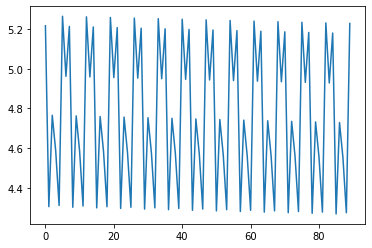

In [24]:
test2= predictions[0]
plt.plot(test2['yhat'])